<a href="https://colab.research.google.com/github/Nethmi-Maleesha/20521336_DSPL_Week7/blob/main/Train_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

Train.csv

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
import plotly.subplots as sp
import plotly.graph_objects as go

In [ ]:
# load traincsv dataset
import pandas as pd
df = pd.read_csv("traincsv.csv")
df.head()

<ipython-input-2-b171fe9d57a1>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("traincsv.csv")


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
# Identify dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
# List down dataset columns
list(df.columns)

['Customer_ID',
 'outlet_city',
 'luxury_sales',
 'fresh_sales',
 'dry_sales',
 'cluster_catgeory']

In [ ]:
# Get dataset dimmentions
shape_before_preprocessing = df.shape
shape_before_preprocessing

(774155, 6)

In [ ]:
#Get summery statistics for numerics
df.describe()

,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


In [ ]:
#Getting summery statistics for objects
df.describe(include='object')

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,774153,774120,774114,774125.00,774154
unique,20,143897,257030,270131.00,18
top,Colombo,1029.6,4296.6,9168.72,1
freq,41031,62,28,23.00,188975


In [ ]:
# Get unique values in columns in a ascending order
for col in df.columns:
    unique_values = df[col].unique()
    sorted_values = sorted(unique_values, key=lambda x: str(x))  # This ensures mixed data types sort without any errors
    print(f"Unique values in {col}: {sorted_values}\n")

In [ ]:
# Identify number of missing values
df.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [ ]:
# Identify number of missing values as a percentage
df.isna().sum()/len(df)*100

,0
Customer_ID,0.000258
outlet_city,0.000258
luxury_sales,0.004521
fresh_sales,0.005296
dry_sales,0.003875
cluster_catgeory,0.000129


In [ ]:
# Observe number of duplicated values
df.duplicated().sum()

0

In [ ]:
Numerical_columns = ('luxury_sales', 'fresh_sales', 'dry_sales')

# Generate histograms
plt.figure(figsize=(12, 6))
for col in Numerical_columns:
  col = px.histogram(df, x = col)
  col.show()

By Looking at these histograms, each of them has a skewed distribution. Therefore when handling missing values, it is reasonable to use median imputation.

## Data Preprocessing

In [ ]:
# Removing spaces in column values
columns_to_clean = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Convert columns to string type before applying str.replace
for col in columns_to_clean:
    df[col] = df[col].astype(str)

df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.replace(' ', '', regex=True))

In [ ]:
import re

# Extract rows where the 'luxury_sales' column contains strings
strings_in_luxury_sales = df['luxury_sales'][df['luxury_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

,count
luxury_sales,
nan,35
nul,3
Onethousandfourhundreadruppes,1
Eighthundreadruppess,1
sixhundreadandhirty,1
Thousandtowhundread,1
sevenhundreadandnineruppees,1
Threethousandtwohundreadruppess,1
Fourthousandonehundreadruppess,1


In [ ]:
import re

# Extract rows where the 'fresh_sales' column contains strings
strings_in_luxury_sales = df['fresh_sales'][df['fresh_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

,count
fresh_sales,
nan,41
nul,4
Sixhundreadandfiveruppes,1
Threethousanaandfivehundread,1
thirteenthousandruppes,1
Fivethousandruppes,1
Twothousandsevenhundreadruppess,1


In [ ]:
import re

# Extract rows where the 'dry_sales' column contains strings
strings_in_luxury_sales = df['dry_sales'][df['dry_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

,count
dry_sales,
nan,30
nul,7
Fourthousandandtwohundreadruppes,1


In [ ]:
# Remove string values and symbols
df.replace({'Onethousandfourhundreadruppes': 1400,
            'Eighthundreadruppess': 800,
            'sixhundreadandhirty': 630,
            'Thousandtowhundread': 2200,
            'sevenhundreadandnineruppees': 709,
            'Threethousandtwohundreadruppess': 3200,
            'Fourthousandonehundreadruppess': 4100,
            'Sixhundreadandfiveruppes': 605,
            'Threethousanaandfivehundread': 3500,
            'thirteenthousandruppes': 13000,
            'Fivethousandruppes': 5000,
            'Twothousandsevenhundreadruppess': 2700,
            'Fourthousandandtwohundreadruppes': 4200,
            '6\\': 6}, inplace=True)

In [ ]:
# Handle Missing Values

# Convert values between numeric and NaN
import numpy as np
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Fill missing data

# Fill missing values with median imputaion
df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)
df['fresh_sales'].fillna(df['fresh_sales'].median(), inplace=True)
df['dry_sales'].fillna(df['dry_sales'].median(), inplace=True)

# Fill missing values with mode imputaion
df['outlet_city'].fillna(df['outlet_city'].mode()[0], inplace=True)
df['cluster_catgeory'].fillna(df['cluster_catgeory'].mode()[0], inplace=True)

<ipython-input-18-70f02fb778f3>:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-18-70f02fb778f3>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

Both outlet_city and cluster_catgeory are categorical variables. Therefore mode inputation will be used for impute missing values.


In [ ]:
# Identify number of missing values
df.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


Since Customer_ID is a unique key in the dataset, it need not any imputation for missing values a

In [ ]:
#Change data types
df['luxury_sales'] = df['luxury_sales'].astype('float')
df['fresh_sales'] = df['fresh_sales'].astype('float')
df['dry_sales'] = df['dry_sales'].astype('float')
df['cluster_catgeory'] = df['cluster_catgeory'].astype('int')

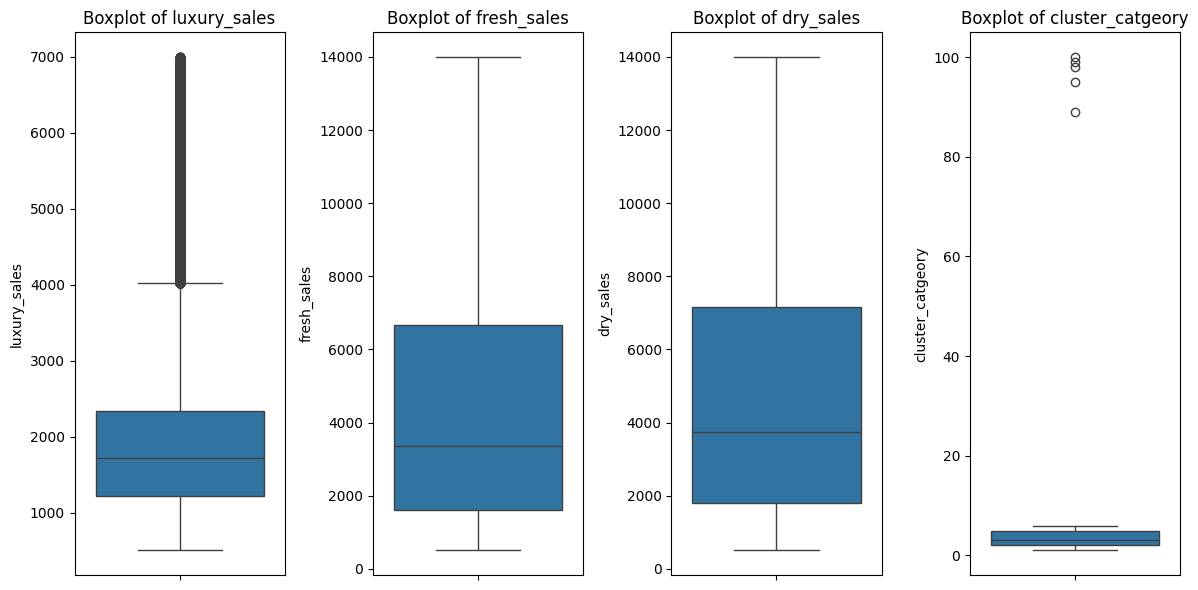

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the column name in the list
columns_to_check = ["luxury_sales", "fresh_sales", "dry_sales", "cluster_catgeory"]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create boxplots
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [ ]:
# Outllier detection function
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

In [ ]:
# Detect outliers in luxury_sales with outllier detection function
ls_outliers = find_outliers_IQR(df['luxury_sales'])
print("number of outliers: "+ str(len(ls_outliers)))
ls_outliers

number of outliers: 35060


,luxury_sales
327511,4514.84
327515,4248.30
327521,5053.76
327522,4169.40
327525,4428.93
...,...
774148,5264.00
774151,6095.86
774152,5121.42
774153,6311.76


In [ ]:
# Sort outliers in luxury_sales with ascending order
sorted_outliers = ls_outliers.sort_values()
sorted_outliers.unique()

array([4026.33, 4026.4 , 4026.56, ..., 6994.75, 6996.85, 6999.65])

Luxury goods are normally higher prized than fresh goods and dry goods, it is possible to have higher values in luxury_sales. Therefore let's not consider these values as outliers.

In [ ]:
# Detect outliers in fresh_sales with outllier detection function
outliers = find_outliers_IQR(df['fresh_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,fresh_sales


In [ ]:
# Detect outliers in dry_sales with outllier detection function
outliers = find_outliers_IQR(df['dry_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,dry_sales


In [ ]:
# Detect outliers in cluster_catgeory with outllier detection function
outliers = find_outliers_IQR(df['cluster_catgeory'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 5


,cluster_catgeory
17,99
172456,95
172689,98
555703,100
558115,89


It is said in the scope of the problem, through an initial analysis, 6 customer segments of customers were identified. Therefore these outliers must be removed from the dataset.

In [ ]:
# Remove outliers
df.drop(df.index[[17,172456,172689,555703,558115]], inplace=True)

In [ ]:
#Encoding categorical variables
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Encoded_outlet_city']= label_encoder.fit_transform(df['outlet_city'])
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Encoded_outlet_city
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,11
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,13
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,19
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,19
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,11


In [ ]:
# Get dataset dimmentions before preprocessing
shape_before_preprocessing

(774155, 6)

In [ ]:
# Get dataset dimmentions after preprocessing
shape_after_preprocessing = df.shape
shape_after_preprocessing

(774150, 7)

## Prepared Train Dataset

In [ ]:
# Save cleaned dataframe to csv
try:
  df.to_csv('cleaned_traincsv.csv', index=False)
  print('prepared_traincsv.csv saved successfully')
except Exception as e:
  print(f"An error occurred: {e}")

cleaned_train_data.csv saved successfully
